In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('../csv-data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [8]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [9]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [10]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [11]:
df[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [12]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [13]:
#컬럼 == 변수 == 특성(feature) == 속성(property, attribute) == entry == 
#열 == fields == 항목

In [14]:
## 저장할 데이터의 컬럼을 선정하는 것이 중요!
## 컬럼을 재가공
## 피쳐 엔지니어링

In [15]:
## 컬럼간의 상관정도를 수치로 표현하여 컬럼간의 관계성을 고려해볼 수 있음.
## 상관도: 상관이 있는 정(Correlation)
## 상관계수: 상관 정도가 수치로 표현된 것(corr)

In [16]:
## 상관 <----> 연관
## 상관: 관계가 있긴 있음을 나타내는 정도
## 연관: 관계가 있고, 하나가 다른 하나에 영향을 미치는 정도

In [17]:
## 상관도를 구할 때 사용하는 방법
## 1) corr()함수를 이용
## 2) 그래프를 이용- heatmap(), pairplot()

In [18]:
df[['wine_servings', 'beer_servings']].corr()

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


In [19]:
# 상관도를 구하고 나서 수치 보는 법
# 0.7~1 : 높은 상관관계
# 0.5~0.7 : 중간 상관관계
# 0.3~0.5 : 낮은 상관관계
# 0~0.3 : 아주 낮은 상관관계
# 상관계수가 +이면, 양의 상관관계
# 상관계수가 -이면, 음의 상관관계

In [20]:
df[['wine_servings', 'beer_servings']].corr()

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


In [21]:
# wine, beer
# spirit : 보드카
# total_litres_of_pure_alcohol : 총 알콜 소비량

In [22]:
corr=df.corr() #피어슨 상관계수
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [23]:
#살균제 양, 살균제 사용연령, 기후, 방의 크기, 살균제 사용 기간, 층의 높이, 사망여부
# 기후. 층의 높이
# 기후, 층은  corr() 구해보면 아주 낮은 상관도를 보임.(0.0001)

In [24]:
import seaborn as sns

In [25]:
cols=['beer','spirit','wine','alcohol']

In [26]:
corr=df.corr()

In [27]:
sns.set(font_scale=1.5)

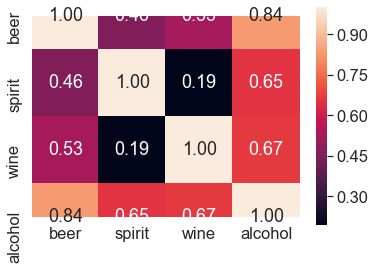

In [28]:
sns.heatmap(
           corr.values,
           cbar=True,
           annot=True,
           square=True,
           fmt=".2f",
           xticklabels=cols,
           yticklabels=cols
           )

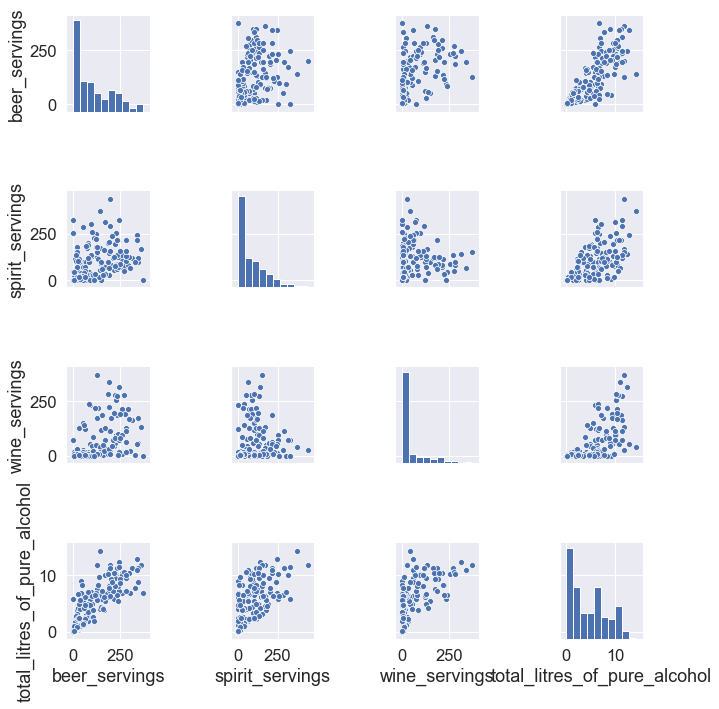

In [29]:
sns.pairplot(df, height=2.5)

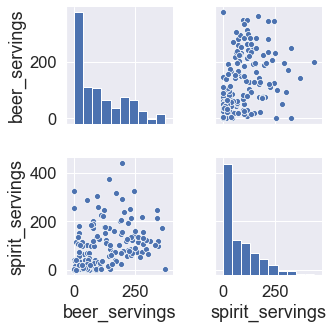

In [30]:
sns.pairplot(df[['beer_servings', 'spirit_servings']], height=2.5)

In [31]:
#titanic data read! -> corr, heatmap, pairplot
df2=sns.load_dataset("titanic")
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
corr2=df2.corr()
corr2

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [33]:
cols2 = ['survived','pclass','age','sibsp','parch','fare','adult_male','alone']

In [34]:
sns.set(font_scale=1)

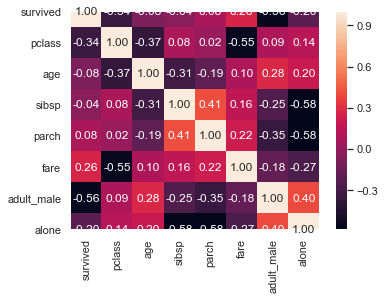

In [35]:
sns.heatmap(
           corr2.values,
           cbar=True,
           annot=True,
           square=True,
           fmt=".2f",
           xticklabels=cols2,
           yticklabels=cols2
           )

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

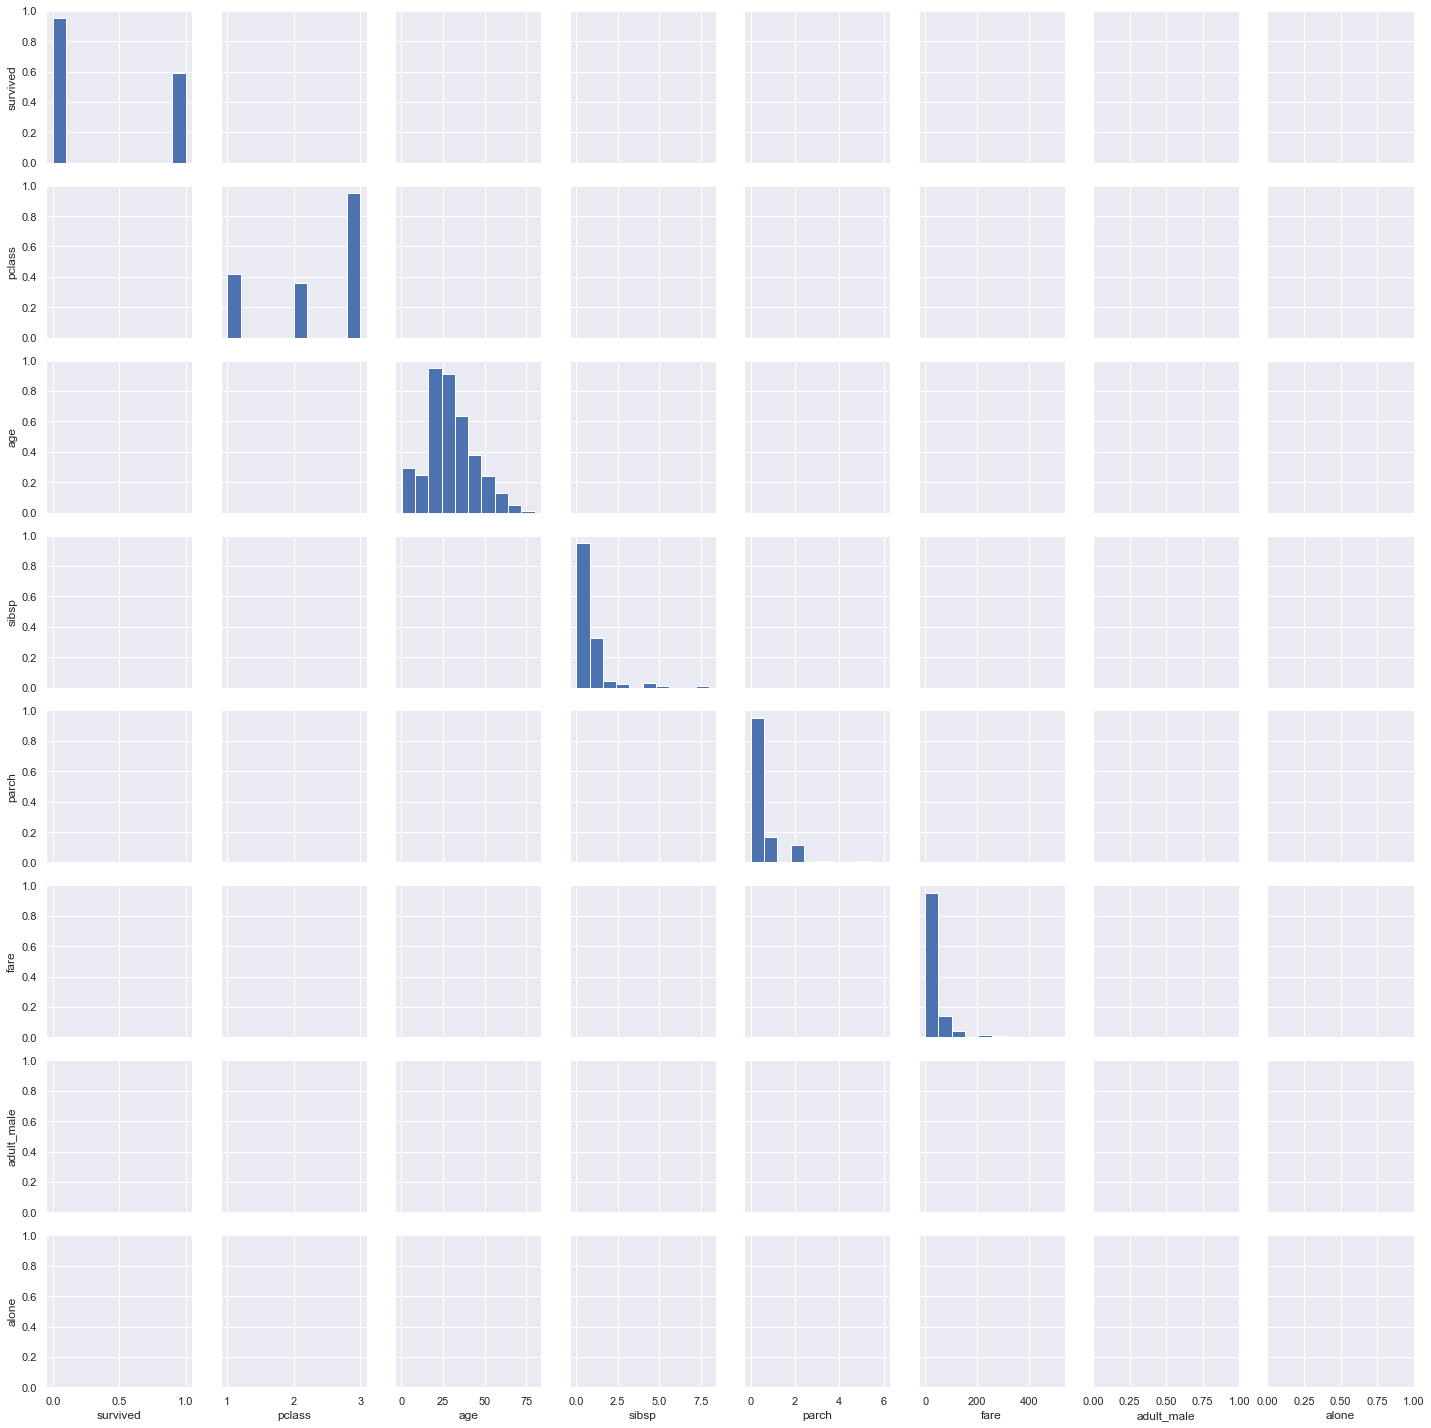

In [36]:
sns.pairplot(df2[cols2])
plt.show()

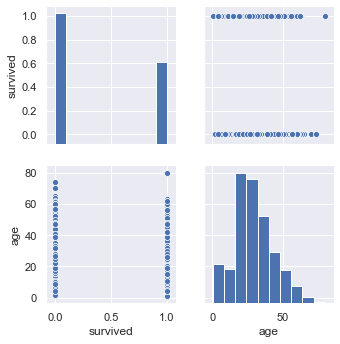

In [37]:
sns.pairplot(df2[['survived', 'age']], height=2.5)

In [38]:
# 대륙별 비율 파이차트로 구해보자!
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [39]:
df['continent']

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [40]:
continent_count=df['continent'].value_counts()
continent_count

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [41]:
index=continent_count.index
index

Index(['AF', 'EU', 'AS', 'OC', 'SA'], dtype='object')

In [42]:
values=continent_count.values
values

array([53, 45, 44, 16, 12], dtype=int64)

ValueError: 'explode' must be of length 'x'

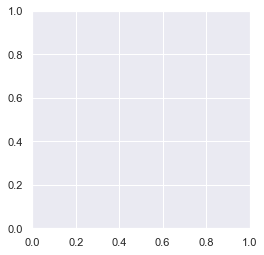

In [43]:
explode=(0, 0, 0, 0.25, 0, 0)
plt.pie(values, labels=index, explode=explode, autopct='%.0f%%', shadow=True)
plt.title('continent')

In [ ]:
labels = df['continent'].value_counts().index.tolist()
fracs1 = df['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('continent')
plt.show()

In [44]:
df[df['continent']=='US']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [45]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [46]:
print(df.isnull().sum())
print(df.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [47]:
print(df.isna().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [48]:
print(df['continent'].isnull().sum())

23


In [49]:
df['continent']=df['continent'].fillna('OT')
print(df['continent'].isnull().sum())

0


In [50]:
result=df.groupby('continent')['beer_servings'].mean()
result

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [51]:
result=df.groupby('continent')['beer_servings'].max()
result

continent
AF    376
AS    247
EU    361
OC    306
OT    285
SA    333
Name: beer_servings, dtype: int64

In [52]:
result=df.groupby('continent')['beer_servings'].agg(['sum', 'mean'])
result

,sum,mean
continent,,
AF,3258,61.471698
AS,1630,37.045455
EU,8720,193.777778
OC,1435,89.687500
OT,3345,145.434783
SA,2101,175.083333


In [53]:
#winde의 대륙별 합계, 평균, 최대를 구해보세요.

In [54]:
## 전체 알콜 소비량 평균보다 많은 알코올을 섭취하는 대륙을 구해보세요

In [55]:
# 대륙별 알코올 소비 평균

In [56]:
## beer_servings가 200 이상인 것들만 추출!

In [57]:
df[df['beer_servings']>=200]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
16,Belgium,295,84,212,10.5,EU
17,Belize,263,114,8,6.8,OT
23,Brazil,245,145,16,7.2,SA
25,Bulgaria,231,252,94,10.3,EU
32,Canada,240,122,100,8.2,OT
42,Croatia,230,87,254,10.2,EU


In [58]:
# 맥주의 평균값을 구해보고,
# 맥주의 평균값보다 높은 대륙 리스트를 구해보세요.
# 맥주의 최대값을 가지는 대륙은 어디인가요?

In [59]:
# 맥주의 평균값보다 높은 나라 리스트 프린트
# 맥주의 평균값보다 높은 나라와 맥주의 소비량 프린트
# 맥주의 평균값보다 높은 나라 리스트의 개수 프린트

In [60]:
df['beer_servings'].mean()

106.16062176165804

In [61]:
df[df['beer_servings']>df['beer_servings'].mean()].groupby('continent')

In [62]:
df[df['beer_servings']>df['beer_servings'].mean()]['continent']

3      EU
4      AF
6      SA
8      OC
9      EU
       ..
182    EU
184    OT
185    SA
188    SA
189    AS
Name: continent, Length: 76, dtype: object

In [63]:
df.groupby('continent')['beer_servings'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [64]:
df[df['beer_servings']>df['beer_servings'].mean()]['beer_servings'].max()

376

In [65]:
df[df['beer_servings']>df['beer_servings'].mean()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,EU
184,USA,249,158,84,8.7,OT
185,Uruguay,115,35,220,6.6,SA
188,Venezuela,333,100,3,7.7,SA


In [66]:
#South Korea

In [67]:
df[df['country']=='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS


In [88]:
korea=df[df['country']=='South Korea']['beer_servings']
korea

138    140
Name: beer_servings, dtype: int64

In [83]:
df[df['country']=='South Korea'][['beer_servings', 'country']]

,beer_servings,country
138,140,South Korea


In [87]:
df[df['country']=='South Korea'][['beer_servings', 'wine_servings', 'country']]

,beer_servings,wine_servings,country
138,140,9,South Korea


In [82]:
## 맥주 평균보다 한국의 소비량이 높은가?
## 얼마나 높은가?

In [89]:
mean=df['beer_servings'].mean()
mean

106.16062176165804

In [91]:
difference=korea-mean
difference

138    33.839378
Name: beer_servings, dtype: float64

In [92]:
## 와인!

In [101]:
korea=df[df['country']=='South Korea']['wine_servings']
mean=df['wine_servings'].mean()
difference=korea-mean
difference

138   -40.450777
Name: wine_servings, dtype: float64